<a href="https://colab.research.google.com/github/RohanOpenSource/ml-notebooks/blob/main/DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

Let's start out with classification with decision trees and then move on to regression.

In [3]:
iris = load_iris()
X =  iris.data[:, 2:] # the third attribute and everything after it is the petal length and the width as there are only 4 attributes
y = iris.target

In [4]:
model = DecisionTreeClassifier(max_depth=2)
model.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Since A decision tree is not a black box model, we can see what rules it is forming in order to classify that data.

In [16]:
from sklearn.tree import export_graphviz
diagram = export_graphviz(
    model, 
    out_file=("iris_tree.dot"),
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

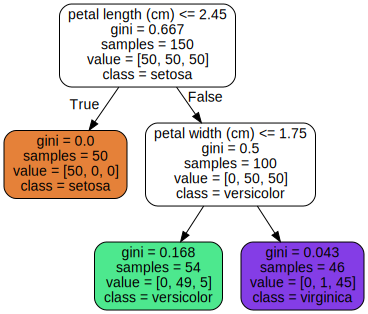

In [17]:
import graphviz

with open("iris_tree.dot") as f:
    dot_graph = f.read()

# remove the display(...)

graphviz.Source(dot_graph)

From this diagram, it is pretty obious why the decision tree is called what it is. It splits the data into to subsets and keeps splitting each subset until it has a result. This is done by the CART training algorithm which recursively splits the data into a tree of rules. Anyhow, it is time for regresion.

In [30]:
model_2 = DecisionTreeRegressor(max_depth=3)
model_2.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [31]:
from sklearn.tree import export_graphviz
diagram_2 = export_graphviz(
    model_2, 
    out_file=("iris_tree_lin.dot"),
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

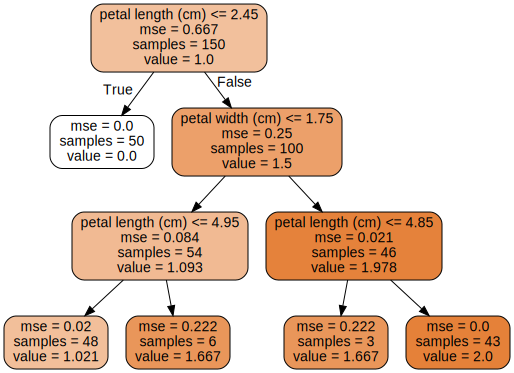

In [32]:
import graphviz

with open("iris_tree_lin.dot") as f:
    dot_graph = f.read()

# remove the display(...)

graphviz.Source(dot_graph)

Decision Tress are unlike other models because they make very few generalizations about the data. This means that they will badly overfit with a high max depth and will have overly basic rules for a lower max depth. This means that in most cases, decision trees aren't that great. However, Random forests are an evolution of decision trees that fix their issues.